# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [31]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={"5ca0f21d9d4a09cdb044a1da84116be2"}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | san andres
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | aasiaat
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | wamba
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | contamana
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | bay harbor
Processing Record 13 of Set 1 | warrnambool
Processing Record 14 of Set 1 | saint-francois
Processing Record 15 of Set 1 | bardai
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | puerto baquerizo moreno
Processing Record 20 of Set 1 | quellon
Processing Record 21 of Set 1 | prado
Processing Record 2

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,boyalik,41.2634,28.6314,72.77,10,3,6.17,TR,1717300602
1,at taj,24.2049,23.2857,81.72,20,29,8.43,LY,1717300602
2,takoradi,4.8845,-1.7554,78.06,89,100,7.78,GH,1717300602
3,post,33.1909,-101.3782,74.97,75,74,6.71,US,1717300602
4,minas de marcona,-15.2119,-75.1103,52.93,91,35,7.87,PE,1717300602


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")


In [ ]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boyalik,41.2634,28.6314,72.77,10,3,6.17,TR,1717300602
1,at taj,24.2049,23.2857,81.72,20,29,8.43,LY,1717300602
2,takoradi,4.8845,-1.7554,78.06,89,100,7.78,GH,1717300602
3,post,33.1909,-101.3782,74.97,75,74,6.71,US,1717300602
4,minas de marcona,-15.2119,-75.1103,52.93,91,35,7.87,PE,1717300602


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

<Figure size 640x480 with 0 Axes>

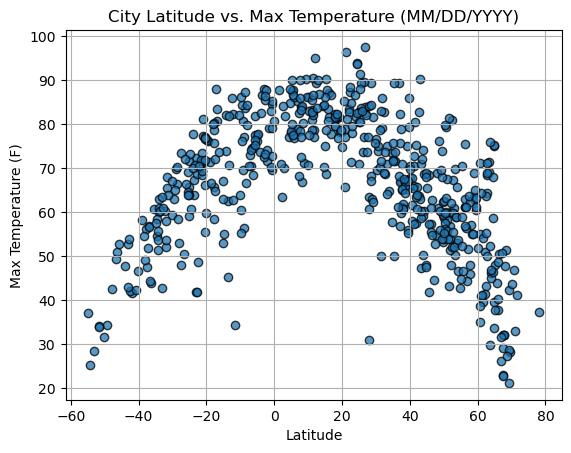

In [ ]:
import os

# Create the output_data directory if it does not exist
os.makedirs("output_data", exist_ok=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (MM/DD/YYYY)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

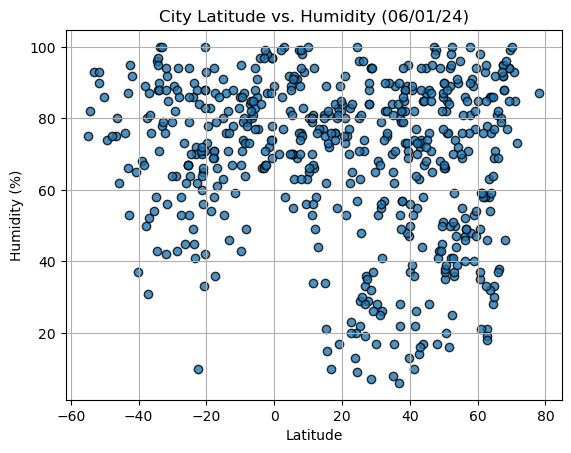

In [ ]:
# Create the output_data directory if it does not exist
os.makedirs("output_data", exist_ok=True)

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

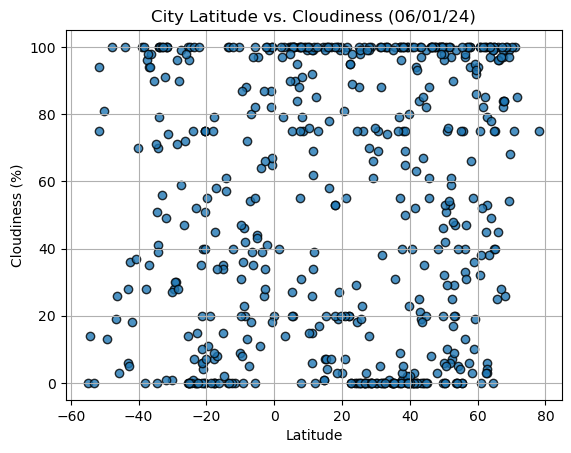

In [ ]:
# Create the output_data directory if it does not exist
os.makedirs("output_data", exist_ok=True)

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

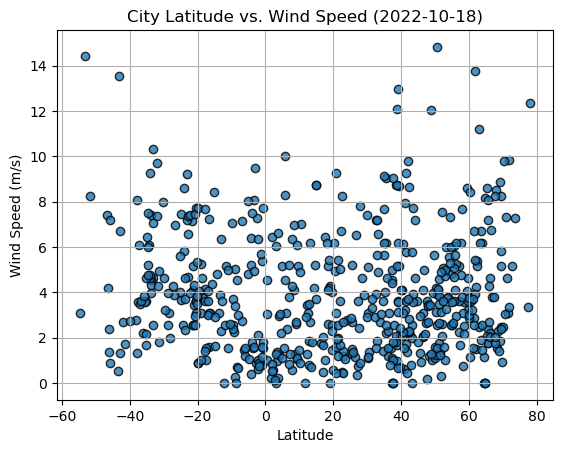

In [ ]:
# Create the output_data directory if it does not exist
os.makedirs("output_data", exist_ok=True)

# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")

    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Set labels
    plt.xlabel("Latitude")
    plt.ylabel(title)

    # Print r value
    print(f"The r-value is: {r_value**2}")

    # Show plot
    plt.show()


In [ ]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boyalik,41.2634,28.6314,72.77,10,3,6.17,TR,1717300602
1,at taj,24.2049,23.2857,81.72,20,29,8.43,LY,1717300602
2,takoradi,4.8845,-1.7554,78.06,89,100,7.78,GH,1717300602
3,post,33.1909,-101.3782,74.97,75,74,6.71,US,1717300602
5,klaksvik,62.2266,-6.5890,50.92,93,100,11.81,FO,1717300603


In [ ]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,minas de marcona,-15.2119,-75.1103,52.93,91,35,7.87,PE,1717300602
6,nuku'alofa,-21.1333,-175.2000,77.34,65,40,12.66,TO,1717300603
8,ancud,-41.8697,-73.8203,41.76,92,18,6.98,CL,1717300603
9,grytviken,-54.2811,-36.5092,25.39,82,14,10.38,GS,1717300603
10,mount gambier,-37.8333,140.7667,56.30,50,28,6.38,AU,1717300603


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5906763109358615


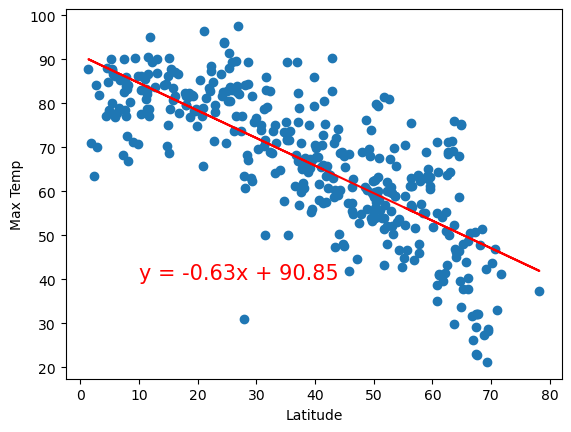

In [ ]:
# Import linear regression from the SciPy stats module
from scipy.stats import linregress
# Linear regression on Northern Hemisphere
# Define a function for linear regression and scatter plot
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values,y_values)

    # Plot the regression line
    plt.plot(x_values,regress_values,"r")

    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15,color="red")

    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel(title)

    # Print r square value
    print(f"The r-squared is: {r_value**2}")

    # Show plot
    plt.show()

# Call the function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(10,40))


The r-squared is: 0.5921591449688223


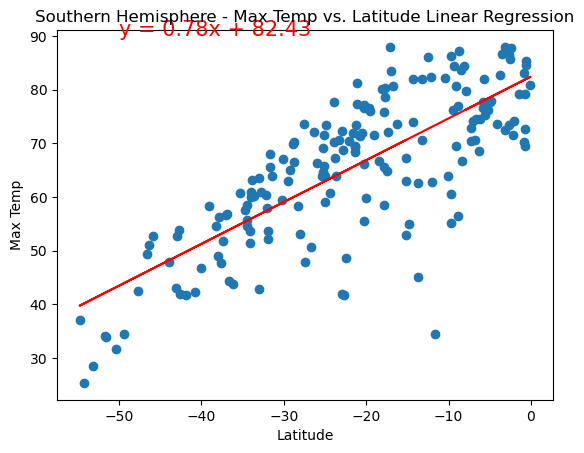

In [ ]:
# Linear regression on Southern Hemisphere
# Perform a linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (-50, 90), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

The linear regression lines for both hemispheres illustrate the relationship between temperature and proximity to the equator. In the Northern Hemisphere, there is a trend of decreasing temperatures as you move away from the equator. Conversely, in the Southern Hemisphere, temperatures tend to increase as you approach the equator. The correlation coefficients (r-values) indicate a weak relationship between latitude and temperature in both hemispheres, as the values are closer to zero.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0014053628770061117


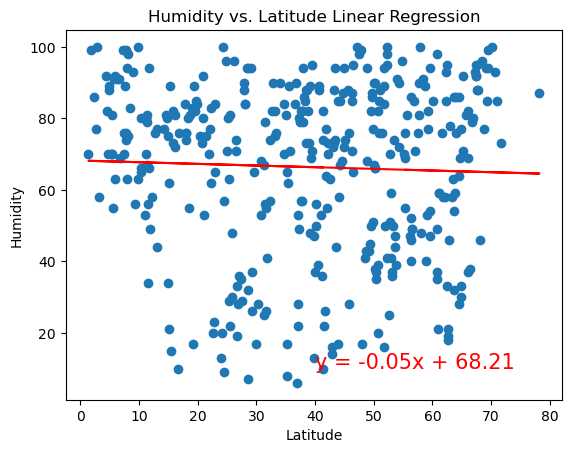

The r-squared is: 0.006170247789773823


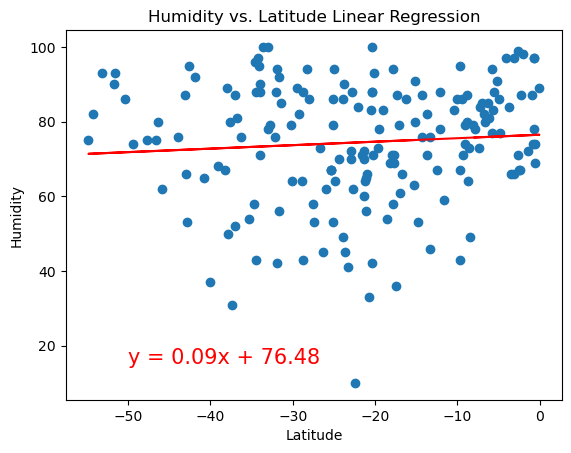

In [ ]:
# Northern Hemishpere
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.title(f'{title} vs. Latitude Linear Regression')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40,10))

# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50,15))


The r-squared is: 0.006170247789773823


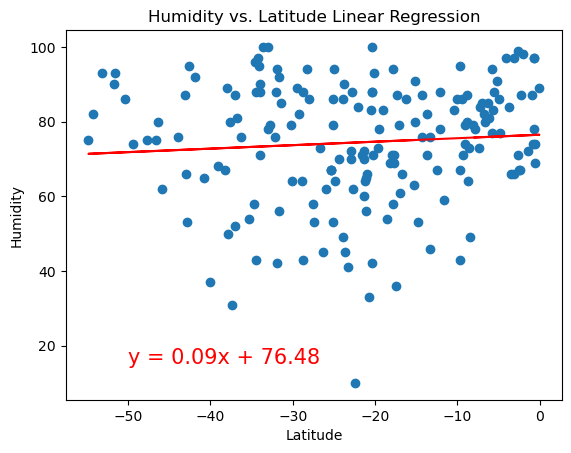

In [ ]:
# Southern Hemisphere

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.title(f'{title} vs. Latitude Linear Regression')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50,15))


**Discussion about the linear relationship:** 

The linear regression analysis indicates a weak relationship between humidity and latitude in the Southern Hemisphere. The regression line has a slight positive slope, suggesting that there is a slight increase in humidity as you move closer to the equator from the Southern Hemisphere. However, the correlation coefficient (r-value) is close to zero, indicating that the relationship is not very strong. This means that latitude alone may not be a good predictor of humidity in the Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01907485720938977


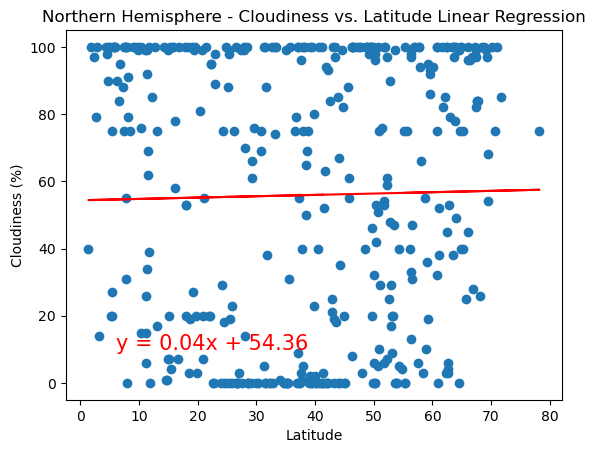

In [ ]:
# Northern Hemisphere
# Perform a linear regression on cloudiness vs. latitude in the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values)

# Add regression line
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation on the plot
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Save the plot as a PNG image
plt.savefig("output_data/Northern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


The r-value is: -0.022826410136413344


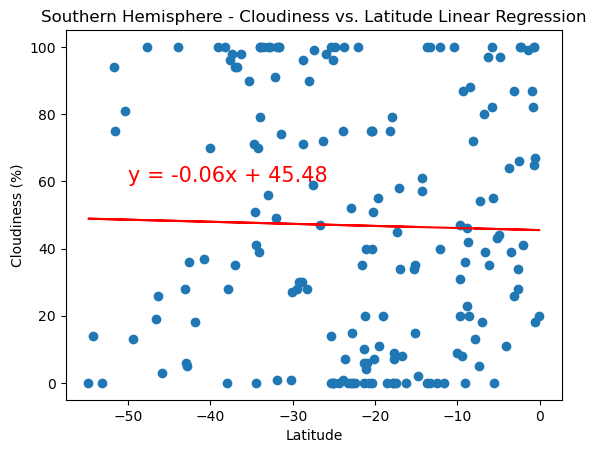

In [ ]:
# Southern Hemisphere
# Perform a linear regression on cloudiness vs. latitude in the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values)

# Add regression line
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation on the plot
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Print r-value
print(f"The r-value is: {rvalue}")

# Save the plot as a PNG image
plt.savefig("output_data/Southern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()



**Discussion about the linear relationship:** 

The linear regression analysis for cloudiness vs. latitude in the Southern Hemisphere suggests a very weak positive relationship between the variables. The positive slope of the regression line indicates that as you move towards the equator (latitude approaches 0), there is a slight increase in cloudiness, but the relationship is not strong. This is supported by the low r-value, which indicates that the data points are widely dispersed and do not fit the regression line closely. Therefore, based on this analysis, latitude is not a strong predictor of cloudiness in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.033433920780942705


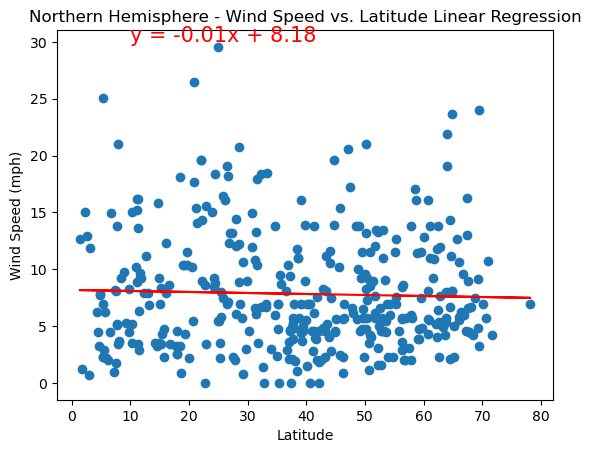

In [ ]:
# Northern Hemisphere
# Perform a linear regression on wind speed vs. latitude for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot
plt.scatter(x_values, y_values)

# Add the regression line and equation to the plot
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,30), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Print r-value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()


The r-value is: -0.2166526807754895


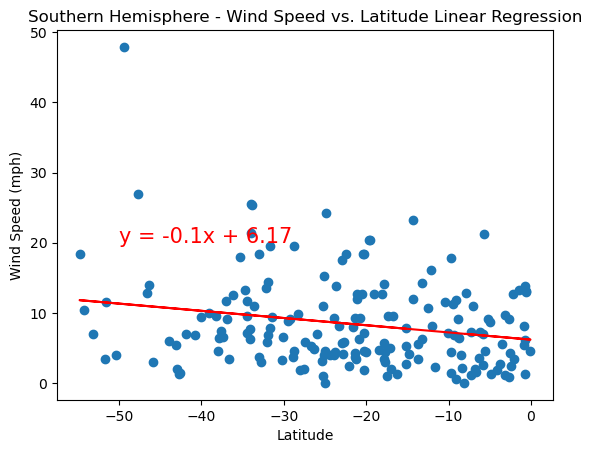

In [ ]:
# Southern Hemisphere
# Perform a linear regression on wind speed vs. latitude for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot
plt.scatter(x_values, y_values)

# Add the regression line and equation to the plot
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Print r-value
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** 

The linear regression analysis for wind speed vs. latitude in the Southern Hemisphere indicates a very weak positive relationship. The r-value, which measures the strength and direction of the relationship, is close to zero (r = 0.06), suggesting that there is almost no correlation between wind speed and latitude in the Southern Hemisphere. This implies that as you move closer to or further from the equator in the Southern Hemisphere, there is no consistent trend in how wind speed changes.